<a href="https://colab.research.google.com/github/gabrielcarcedo/Programa-Intensivo-en-Ciencia-de-Datos-De-los-Fundamentos-al-Deep-Learning/blob/main/Notebooks/Sesi%C3%B3n%203/2_Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 3: Redes neuronales artificiales
## Redes neuronales convolucionales


El objetivo de esta libreta es visualizar algunas capas convoluciones y observar "cómo aprenden".

La imagen usada en esta libreta fue descargada del sitio: [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/main.html)


In [ ]:
#Carga de bibliotecas
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D

## Paso 1: carga de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


imagen_grises:  (333, 500)


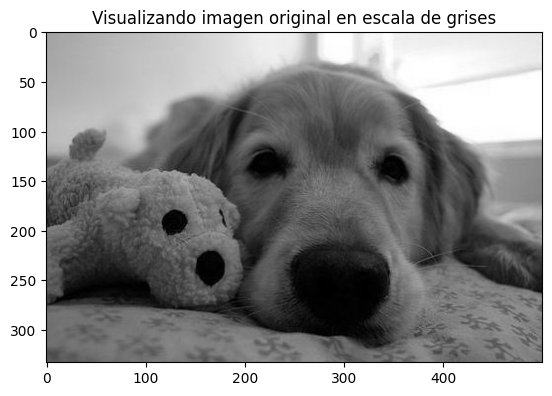

In [ ]:
#Carga de la imagen a analizar
ruta_imagen = "/content/drive/MyDrive/Colab Notebooks/2025_TallerIIMAS/n02099601_1743.jpg"
colored_image = cv2.imread(ruta_imagen)
imagen_grises = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY) #conversión a escala de grises
print("imagen_grises: ", imagen_grises.shape)
image = imagen_grises.astype('float32') / 255 #Rescalando la imagen: el valor de cada pixel se divide entre 255
plt.imshow(image, cmap='gray')
plt.title("Visualizando imagen original en escala de grises")
plt.show()

## Paso 2: Análisis de filtros

En esta sección se definirán cuatro filtros para resaltar o aislar características particulares en la imagen seleccionada. Por ahora, los valores de los filtros se definen de forma manual (esto con el fin únicamente didáctico).

**** Visualizando los filtros previamente definidos ****


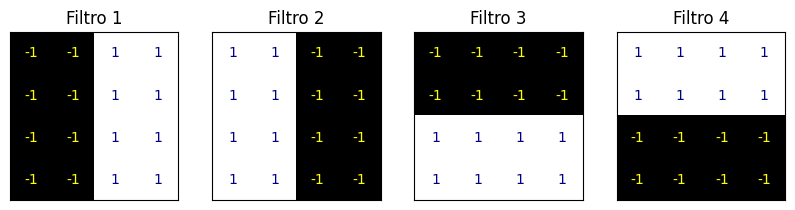

In [ ]:
valores_filtros = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

filtro_1 = valores_filtros
filtro_2 = -filtro_1
filtro_3 = filtro_1.T
filtro_4 = -filtro_3

filtros = [filtro_1, filtro_2, filtro_3, filtro_4]

print("**** Visualizando los filtros previamente definidos ****")
figure = plt.figure(figsize=(10, 5))
for filter_index in range(len(filtros)):
    ax = figure.add_subplot(1, len(filtros), filter_index + 1, xticks=[], yticks=[])
    ax.imshow(filtros[filter_index], cmap='gray')
    ax.set_title(f'Filtro {filter_index + 1}')
    width, height = filtros[filter_index].shape

    for x in range(width):
        for y in range(height):
            filter_value = filtros[filter_index][x][y]
            ax.annotate(f'{filter_value}',
                        xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='yellow' if filter_value < 0 else 'navy')


## Paso 3: visualizando las activaciones en cada filtro


Mostrando imagen original en escala de grises
Definición del modelo


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


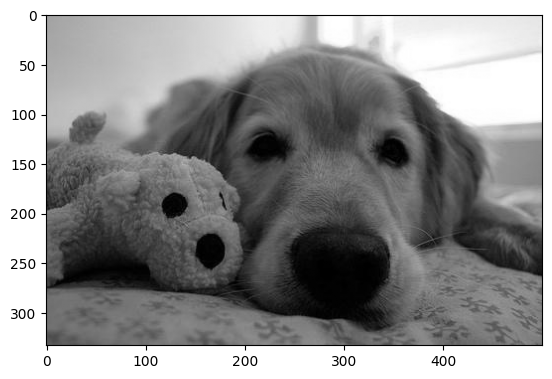

In [ ]:
print("Mostrando imagen original en escala de grises")
plt.imshow(image, cmap='gray')

tamaño_imagen = (image.shape[0], image.shape[1], 1)

print("Definición del modelo")
# Tiene una única capa convolucional 2D con un solo filtro
modelo = Sequential()
modelo.add(Conv2D(1, 4, activation='relu', input_shape=tamaño_imagen))

In [ ]:
def apply_filter(image, indice, lista_filtros, ax):
    #Se aplicará la convolución y se analizará la salida
    pesos_manuales = [np.reshape(lista_filtros[indice], (4, 4, 1, 1)), np.array([0])]
    modelo.layers[0].set_weights(pesos_manuales)

    input = np.reshape(image, (1, image.shape[0], image.shape[1], 1))
    prediction = modelo.predict(input) #Predicción
    ax.imshow(np.squeeze(prediction), cmap='gray') #Visualizando filtros

Visualizando filtros
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


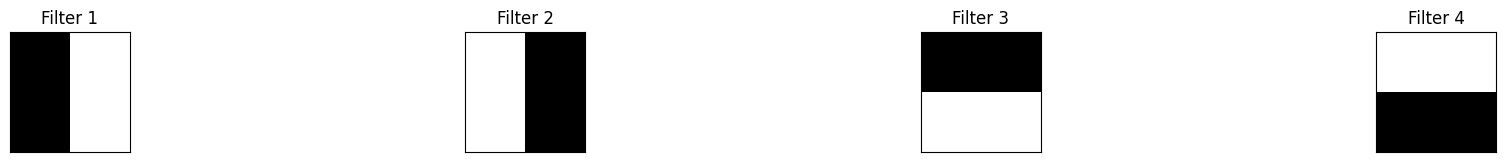

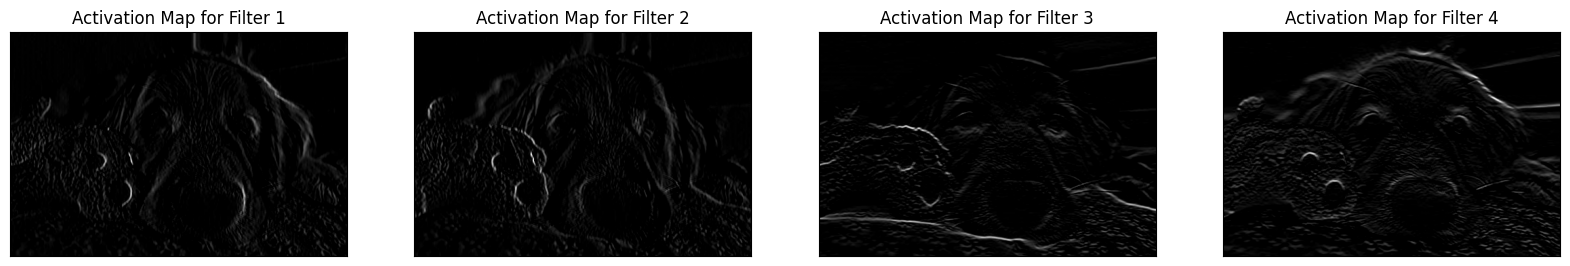

In [ ]:
print("Visualizando filtros")
figure = plt.figure(figsize=(12, 6))
figure.subplots_adjust(left=0,
                       right=1.5,
                       bottom=0.8,
                       top=1,
                       hspace=0.05,
                       wspace=0.05)

for index in range(len(filtros)): #Recorriendo cada filtro
    ax = figure.add_subplot(1, len(filtros), index + 1, xticks=[], yticks=[])
    ax.imshow(filtros[index], cmap='gray')
    ax.set_title(f'Filter {index + 1}')

# Aplicando filtros y visualizqando los mapas de activación
figure = plt.figure(figsize=(20, 20))
for index in range(len(filtros)):
    ax = figure.add_subplot(1, len(filtros), index + 1, xticks=[], yticks=[])
    apply_filter(image, index, filtros, ax)
    ax.set_title(f'Activation Map for Filter {index + 1}')